# Import Libraries and Loading Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Australian Vehicle Prices.xlsx')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
df.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888


# Perfroming Exploratory Data Analysis (EDA)

In [4]:
df.shape

(16734, 19)

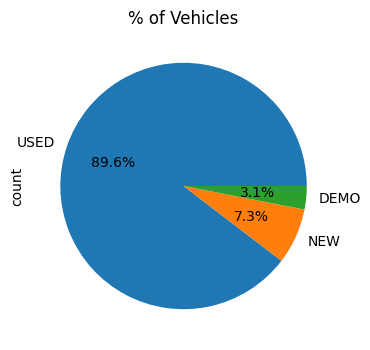

In [5]:
plt.figure(figsize= (5,4))
df['UsedOrNew'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.title('% of Vehicles')
plt.show()

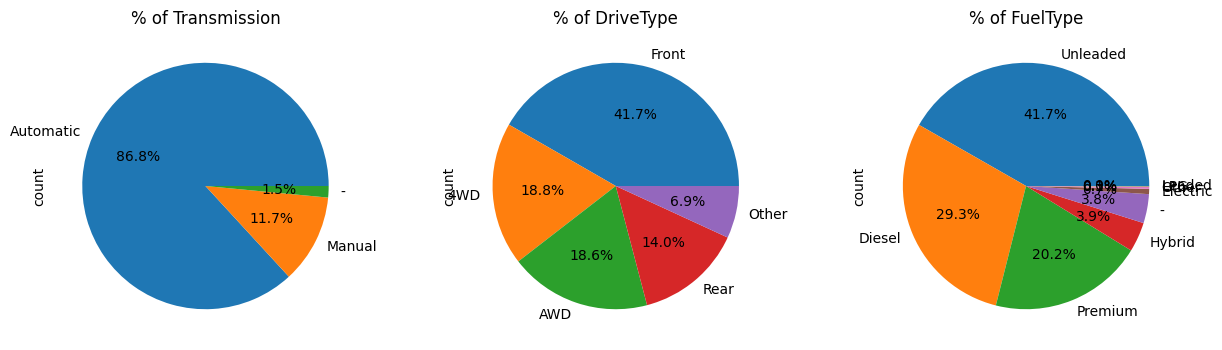

In [6]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Pie chart for Transmission
df['Transmission'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%')
axs[0].set_title('% of Transmission')

# Pie chart for DriveType
df['DriveType'].value_counts().plot.pie(ax=axs[1], autopct='%1.1f%%')
axs[1].set_title('% of DriveType')

# Pie chart for FuelType
df['FuelType'].value_counts().plot.pie(ax=axs[2], autopct='%1.1f%%')
axs[2].set_title('% of FuelType')

plt.show()


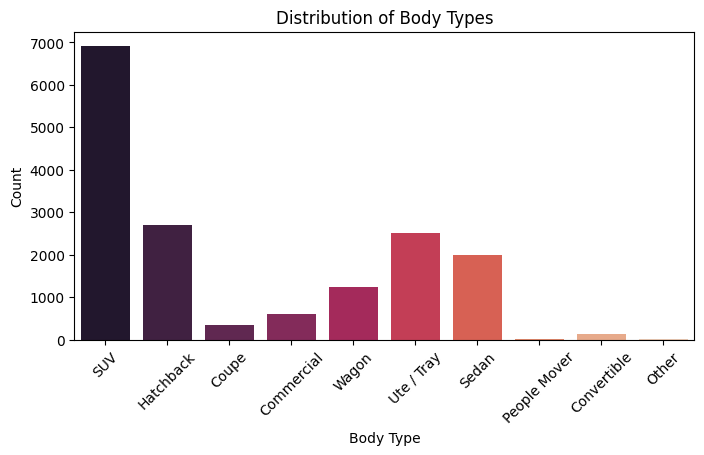

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x='BodyType', data=df, palette='rocket')

plt.title('Distribution of Body Types')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

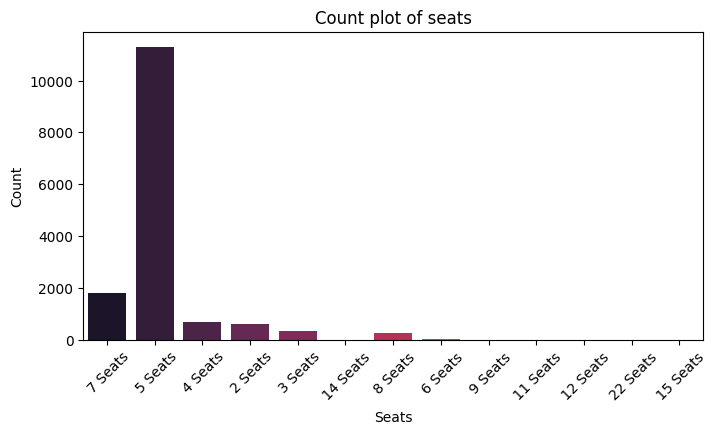

In [8]:
# Count plot for 'Seats'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Seats',palette='rocket')

plt.title('Count plot of seats')
plt.xlabel('Seats')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

# Data Cleaning and Preprocessing


In [9]:
# Assuming df is your DataFrame
columns_to_drop = ['Location', 'ColourExtInt', 'Title','Model','Brand','BodyType']
df.drop(columns=columns_to_drop, inplace=True)


In [10]:
df.isnull().sum()

Year                    1
Car/Suv                28
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
CylindersinEngine       1
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [11]:
# Assuming df is your DataFrame
columns_to_check = [ 'Year', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption','Kilometres','CylindersinEngine','Price','Doors','Seats']
df.dropna(subset=columns_to_check, inplace=True)


In [12]:
df.isnull().sum()


Year                  0
Car/Suv              13
UsedOrNew             0
Transmission          0
Engine                0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometres            0
CylindersinEngine     0
Doors                 0
Seats                 0
Price                 0
dtype: int64

In [13]:
df.shape


(15028, 13)

In [14]:
df.head(10)


,Year,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
0,2022.0,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,4 cyl,4 Doors,7 Seats,51990
1,2022.0,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,4 cyl,5 Doors,5 Seats,19990
2,2022.0,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,4 cyl,2 Doors,4 Seats,108988
3,2011.0,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,8 cyl,2 Doors,4 Seats,32990
4,2022.0,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,4 cyl,4 Doors,5 Seats,34990
6,2017.0,SUV,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,5.1 L / 100 km,67662,4 cyl,2 Doors,4 Seats,62280
7,2000.0,Hatchback,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,8 L / 100 km,300539,4 cyl,5 Doors,5 Seats,2995
8,2013.0,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,7.1 L / 100 km,82012,4 cyl,2 Doors,4 Seats,24888
9,2014.0,Hatchback,USED,Automatic,"4 cyl, 1.3 L",Front,Hybrid,4.5 L / 100 km,38229,4 cyl,5 Doors,5 Seats,17900
11,2018.0,Commercial,USED,Automatic,"4 cyl, 2.7 L",Rear,Unleaded,9.8 L / 100 km,16324,4 cyl,4 Doors,2 Seats,41999


In [15]:
df[df['Engine']=='0 L']

,Year,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
625,2019.0,Hatchback,USED,Automatic,0 L,Front,Electric,0 L / 100 km,41067,0 L,4 Doors,5 Seats,39990
911,2019.0,Sedan,USED,Automatic,0 L,AWD,Electric,0 L / 100 km,39136,0 L,5 Doors,5 Seats,159888
919,2017.0,SUV,USED,Automatic,0 L,4WD,Electric,0 L / 100 km,126860,0 L,4 Doors,5 Seats,79800
1029,2023.0,Dominelli GWM,DEMO,Automatic,0 L,Front,Electric,0 L / 100 km,15,0 L,5 Doors,5 Seats,45550
1563,2023.0,Alto Blacktown MG,NEW,Automatic,0 L,Front,Electric,0 L / 100 km,15,0 L,4 Doors,5 Seats,57709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15899,2019.0,Hatchback,USED,Automatic,0 L,Front,Electric,0 L / 100 km,25714,0 L,4 Doors,5 Seats,41990
15935,2022.0,Hatchback,USED,Automatic,0 L,Front,Electric,0 L / 100 km,5100,0 L,3 Doors,4 Seats,59990
16262,2021.0,Hatchback,USED,Automatic,0 L,Front,Electric,0 L / 100 km,29050,0 L,5 Doors,5 Seats,48990
16344,2022.0,SUV,USED,Automatic,0 L,Front,Electric,0 L / 100 km,4225,0 L,4 Doors,5 Seats,59360


In [16]:
df = df[df['Engine']!='0 L'].reset_index(drop=True)
df.head()

,Year,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
0,2022.0,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,4 cyl,4 Doors,7 Seats,51990
1,2022.0,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,4 cyl,5 Doors,5 Seats,19990
2,2022.0,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,4 cyl,2 Doors,4 Seats,108988
3,2011.0,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,8 cyl,2 Doors,4 Seats,32990
4,2022.0,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,4 cyl,4 Doors,5 Seats,34990


In [17]:
df[['Cylinders', 'Engine_size(L)']] = df['Engine'].str.split(', ', expand=True)

df['Engine_size(L)'] = df['Engine_size(L)'].str.replace(' L', '')
df['CylindersinEngine'] = df['CylindersinEngine'].str.replace('cyl', '')
df = df.drop(labels=['Engine','Cylinders'],axis=1)
df.head()

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
0,2022.0,Sutherland Isuzu Ute,DEMO,Automatic,AWD,Diesel,8.7 L / 100 km,5595,4,4 Doors,7 Seats,51990,2.2
1,2022.0,Hatchback,USED,Automatic,Front,Premium,6.7 L / 100 km,16,4,5 Doors,5 Seats,19990,1.5
2,2022.0,Coupe,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,4,2 Doors,4 Seats,108988,2
3,2011.0,Coupe,USED,Automatic,Rear,Premium,11 L / 100 km,136517,8,2 Doors,4 Seats,32990,5.5
4,2022.0,SUV,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,4,4 Doors,5 Seats,34990,1.3


In [18]:
df = df.rename(columns={'FuelConsumption': 'FuelConsump_per_100km'})
df['FuelConsump_per_100km'] = df['FuelConsump_per_100km'].str.extract(r'(\d+\.\d+|\d+)').astype(float).astype('float64')


In [19]:
df.head()

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
0,2022.0,Sutherland Isuzu Ute,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4 Doors,7 Seats,51990,2.2
1,2022.0,Hatchback,USED,Automatic,Front,Premium,6.7,16,4,5 Doors,5 Seats,19990,1.5
2,2022.0,Coupe,USED,Automatic,Rear,Premium,6.6,8472,4,2 Doors,4 Seats,108988,2
3,2011.0,Coupe,USED,Automatic,Rear,Premium,11.0,136517,8,2 Doors,4 Seats,32990,5.5
4,2022.0,SUV,USED,Automatic,Front,Unleaded,6.0,1035,4,4 Doors,5 Seats,34990,1.3


In [20]:
df['Seats'] = df['Seats'].str.extract(r'(\d+)')
df['Doors'] = df['Doors'].str.extract(r'(\d+)')
df['Year']  = df['Year'].astype(float).astype(int)

In [21]:
df[df['Kilometres']=='-']

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
1373,2023,Macarthur Renault,NEW,Manual,Front,-,8.3,-,4,5,5,71490,1.8
1772,2023,Macarthur Renault,NEW,Automatic,Front,-,6.6,-,4,4,4,43000,1.3
1805,2023,Macarthur Renault,NEW,Automatic,Front,-,6.6,-,4,4,4,43000,1.3
1957,2023,Liverpool Volkswagen New Cars,NEW,Automatic,AWD,Premium,8.8,-,4,4,5,85990,2
2115,2023,Macarthur Renault,NEW,Automatic,Front,Unleaded,8.1,-,4,4,5,46888,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14837,2022,Moreton Bay Suzuki - New,NEW,Manual,Front,Unleaded,6.1,-,4,5,5,34690,1.4
14840,2023,Brighton Mazda New & Demo,NEW,Automatic,Front,-,8.1,-,4,4,7,54725,2.5
14850,2022,Moreton Bay Suzuki - New,NEW,Automatic,Front,Premium,4.9,-,4,4,5,24485,1.2
14859,2022,Q Suzuki - New,NEW,Automatic,Front,Unleaded,4.8,-,4,5,5,27690,1.2


In [22]:
df = df[df['Kilometres']!='-'].reset_index(drop=True)
df.head()

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
0,2022,Sutherland Isuzu Ute,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,51990,2.2
1,2022,Hatchback,USED,Automatic,Front,Premium,6.7,16,4,5,5,19990,1.5
2,2022,Coupe,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,108988,2
3,2011,Coupe,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,32990,5.5
4,2022,SUV,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,34990,1.3


In [23]:
df[df['Transmission']=='-']

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
1717,2022,DEMO,DEMO,-,AWD,Premium,8.3,585,4,4,5,67074,2
1868,2021,Mini Garage Sydney - Used Cars,USED,-,Front,Premium,5.8,18800,4,3,4,51990,2
2135,2022,Audi Centre Sydney Pre-Owned,USED,-,AWD,Premium,7.1,2001,4,4,5,71880,2
2424,2022,DEMO,DEMO,-,AWD,Premium,8.3,1505,4,4,5,58990,2
3122,2023,DEMO,DEMO,-,AWD,Hybrid,7.1,2088,4,4,5,96888,2
3275,2023,DEMO,DEMO,-,AWD,Hybrid,7.1,2088,4,4,5,93888,2
3315,2021,Audi Alto MacArthur Used Cars,USED,-,AWD,Premium,7.3,39646,4,4,5,57588,2
3449,2022,DEMO,DEMO,-,Front,Premium,5.9,3720,3,5,5,53888,1.5
3553,2023,Sydney Luxury Motors,USED,-,AWD,Premium,13.1,100,8,4,5,478888,4
4533,2022,DEMO,DEMO,-,AWD,Premium,8.3,21,4,4,5,62990,2


In [24]:
df = df[df['Transmission']!='-'].reset_index(drop=True)
df.head()

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
0,2022,Sutherland Isuzu Ute,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,51990,2.2
1,2022,Hatchback,USED,Automatic,Front,Premium,6.7,16,4,5,5,19990,1.5
2,2022,Coupe,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,108988,2
3,2011,Coupe,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,32990,5.5
4,2022,SUV,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,34990,1.3


In [25]:
df[df['FuelType']=='-']

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
349,2023,Alto Blacktown MG,NEW,Automatic,Front,-,6.9,15,4,5,5,27690,1.5
408,2023,Alto Blacktown MG,NEW,Automatic,Front,-,7.1,15,4,4,5,24690,1.5
428,2023,Alto Blacktown MG,NEW,Automatic,Front,-,7.3,15,3,5,5,34990,1.3
472,2023,Alto Blacktown MG,NEW,Automatic,Front,-,7.1,15,4,4,5,24690,1.5
508,2023,Alto Blacktown MG,NEW,Automatic,Front,-,6.9,15,4,5,5,29690,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,2023,Alto North Shore MG,NEW,Automatic,Front,-,7.3,5,3,5,5,POA,1.3
13781,2023,NEW Available to order,NEW,Automatic,Front,-,8.1,- / -,4,4,7,58560,2.5
14144,2023,Liverpool Mazda New Cars,NEW,Automatic,Front,-,8.1,4,4,4,7,53827,2.5
14577,2022,Ralph D'Silva Mitsubishi,NEW,Automatic,AWD,-,1.9,52,4,4,5,51290,2.4


In [26]:
df = df[df['FuelType']!='-'].reset_index(drop=True)
df.head()

,Year,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
0,2022,Sutherland Isuzu Ute,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,51990,2.2
1,2022,Hatchback,USED,Automatic,Front,Premium,6.7,16,4,5,5,19990,1.5
2,2022,Coupe,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,108988,2
3,2011,Coupe,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,32990,5.5
4,2022,SUV,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,34990,1.3


In [27]:
df.shape

(14596, 13)

In [28]:
df.drop(columns=['Car/Suv'], inplace=True)
df.dropna(subset=['Engine_size(L)'], inplace=True)

In [29]:
df.isnull().sum()

Year                     0
UsedOrNew                0
Transmission             0
DriveType                0
FuelType                 0
FuelConsump_per_100km    0
Kilometres               0
CylindersinEngine        0
Doors                    0
Seats                    0
Price                    0
Engine_size(L)           0
dtype: int64

In [30]:
df.head(200)

,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
0,2022,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,51990,2.2
1,2022,USED,Automatic,Front,Premium,6.7,16,4,5,5,19990,1.5
2,2022,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,108988,2
3,2011,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,32990,5.5
4,2022,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,34990,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2013,USED,Automatic,Front,Unleaded,6.6,149974,4,5,5,16990,1.8
196,2019,USED,Automatic,Front,Unleaded,7.4,44879,4,4,5,26990,2
197,2016,USED,Automatic,4WD,Diesel,9.2,110909,5,4,5,34913,3.2
198,2013,USED,Automatic,Front,Unleaded,6.6,109519,4,5,5,19990,1.8


In [31]:
df[df['Price']=='POA']

,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
13543,2021,USED,Automatic,AWD,Hybrid,7.6,52197,4,4,5,POA,2
13824,2017,USED,Automatic,AWD,Unleaded,8.8,64110,4,4,7,POA,2.5
13830,2022,NEW,Automatic,AWD,Diesel,6.3,9,4,4,5,POA,2
13899,2022,DEMO,Automatic,Front,Hybrid,1.7,10,4,5,5,POA,1.5
13921,2022,DEMO,Automatic,Front,Unleaded,4.8,1535,4,5,5,POA,1.2
13995,2022,NEW,Automatic,Front,Diesel,6.6,25,4,4,7,POA,2
14080,2020,NEW,Automatic,AWD,Premium,7.7,12,4,4,5,POA,2
14184,2023,NEW,Automatic,4WD,Diesel,9.3,14,4,4,5,POA,2
14186,2023,NEW,Automatic,Rear,Unleaded,10.2,9,4,4,7,POA,2
14249,2023,NEW,Automatic,Front,Unleaded,4.8,8,4,5,5,POA,1.2


In [32]:
df = df[df['Price']!='POA']
df['Price'] = df['Price'].astype(int)

In [33]:
df.tail()

,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L)
14591,2015,USED,Automatic,Front,Unleaded,6.9,54359,4,4,5,21450,1.6
14592,2021,USED,Automatic,Front,Unleaded,6.9,32977,4,4,5,36770,2
14593,2022,DEMO,Automatic,Front,Unleaded,6.2,5165,4,4,5,35280,1.6
14594,2016,USED,Automatic,AWD,Premium,7.2,85525,4,4,5,41888,2
14595,2021,USED,Automatic,Rear,Unleaded,7.0,31852,4,4,5,65888,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14571 entries, 0 to 14595
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   14571 non-null  int32  
 1   UsedOrNew              14571 non-null  object 
 2   Transmission           14571 non-null  object 
 3   DriveType              14571 non-null  object 
 4   FuelType               14571 non-null  object 
 5   FuelConsump_per_100km  14571 non-null  float64
 6   Kilometres             14571 non-null  object 
 7   CylindersinEngine      14571 non-null  object 
 8   Doors                  14571 non-null  object 
 9   Seats                  14571 non-null  object 
 10  Price                  14571 non-null  int32  
 11  Engine_size(L)         14571 non-null  object 
dtypes: float64(1), int32(2), object(9)
memory usage: 1.3+ MB


In [35]:
threshold = 37303.33463  # Average price

df['PriceClass'] = df['Price'].apply(lambda x: '0' if x < threshold else '1')


In [36]:
df.head()

,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L),PriceClass
0,2022,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,51990,2.2,1
1,2022,USED,Automatic,Front,Premium,6.7,16,4,5,5,19990,1.5,0
2,2022,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,108988,2,1
3,2011,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,32990,5.5,0
4,2022,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,34990,1.3,0


In [37]:

df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce').astype('Int64')

df['CylindersinEngine'] = pd.to_numeric(df['CylindersinEngine'], errors='coerce').astype('Int64')

df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce').astype('Int64')

df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce').astype('Int64')

df['Engine_size(L)'] = df['Engine_size(L)'].astype(float)

df.head()

,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Price,Engine_size(L),PriceClass
0,2022,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,51990,2.2,1
1,2022,USED,Automatic,Front,Premium,6.7,16,4,5,5,19990,1.5,0
2,2022,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,108988,2.0,1
3,2011,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,32990,5.5,0
4,2022,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,34990,1.3,0


In [38]:
df1 = df.copy()

In [39]:

df1 = df1.drop(columns=['Price'])
df1.head()


,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Engine_size(L),PriceClass
0,2022,DEMO,Automatic,AWD,Diesel,8.7,5595,4,4,7,2.2,1
1,2022,USED,Automatic,Front,Premium,6.7,16,4,5,5,1.5,0
2,2022,USED,Automatic,Rear,Premium,6.6,8472,4,2,4,2.0,1
3,2011,USED,Automatic,Rear,Premium,11.0,136517,8,2,4,5.5,0
4,2022,USED,Automatic,Front,Unleaded,6.0,1035,4,4,5,1.3,0


In [40]:
df1.dtypes

Year                       int32
UsedOrNew                 object
Transmission              object
DriveType                 object
FuelType                  object
FuelConsump_per_100km    float64
Kilometres                 Int64
CylindersinEngine          Int64
Doors                      Int64
Seats                      Int64
Engine_size(L)           float64
PriceClass                object
dtype: object

In [41]:
df1.isnull().sum()


Year                       0
UsedOrNew                  0
Transmission               0
DriveType                  0
FuelType                   0
FuelConsump_per_100km      0
Kilometres               374
CylindersinEngine          0
Doors                      0
Seats                      0
Engine_size(L)             0
PriceClass                 0
dtype: int64

In [42]:
cat_col = []
for i in df1.columns:
  if df[i].dtype=='object':
    cat_col.append(i)
cat_col.remove('PriceClass')
print(cat_col)


['UsedOrNew', 'Transmission', 'DriveType', 'FuelType']


In [43]:

def one_hot_encode(df, cat_columns):
    df_encoded = pd.get_dummies(df, columns=cat_columns)
    return df_encoded


df1_enc = one_hot_encode(df1, cat_col)


df1_enc = df1_enc.fillna(0).astype(int)


In [44]:
df1_enc.head()

,Year,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Engine_size(L),PriceClass,UsedOrNew_DEMO,UsedOrNew_NEW,...,DriveType_Front,DriveType_Other,DriveType_Rear,FuelType_Diesel,FuelType_Hybrid,FuelType_LPG,FuelType_Leaded,FuelType_Other,FuelType_Premium,FuelType_Unleaded
0,2022,8,5595,4,4,7,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2022,6,16,4,5,5,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2022,6,8472,4,2,4,2,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2011,11,136517,8,2,4,5,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2022,6,1035,4,4,5,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [45]:
for column in df1_enc.columns:
    print(column)

Year
FuelConsump_per_100km
Kilometres
CylindersinEngine
Doors
Seats
Engine_size(L)
PriceClass
UsedOrNew_DEMO
UsedOrNew_NEW
UsedOrNew_USED
Transmission_Automatic
Transmission_Manual
DriveType_4WD
DriveType_AWD
DriveType_Front
DriveType_Other
DriveType_Rear
FuelType_Diesel
FuelType_Hybrid
FuelType_LPG
FuelType_Leaded
FuelType_Other
FuelType_Premium
FuelType_Unleaded


In [46]:
def get_binary_columns(df):
    binary_cols = [col for col in df.columns if set(df[col]) == {0, 1}]
    return binary_cols


binary_cols = get_binary_columns(df1_enc)
print(binary_cols)


['PriceClass', 'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED', 'Transmission_Automatic', 'Transmission_Manual', 'DriveType_4WD', 'DriveType_AWD', 'DriveType_Front', 'DriveType_Other', 'DriveType_Rear', 'FuelType_Diesel', 'FuelType_Hybrid', 'FuelType_LPG', 'FuelType_Leaded', 'FuelType_Other', 'FuelType_Premium', 'FuelType_Unleaded']


In [47]:
def get_numeric_columns(df, cat_columns):
    num_cols = [col for col in df.columns if df[col].dtype in ['Int64', 'int32', 'float64'] and col not in binary_cols]
    return num_cols


numeric_cols = get_numeric_columns(df1_enc, binary_cols)
print(numeric_cols)


['Year', 'FuelConsump_per_100km', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'Engine_size(L)']


In [48]:

# Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
df1_enc[numeric_cols] = scaler_minmax.fit_transform(df1_enc[numeric_cols])


In [49]:
df1_enc.head(20)

,Year,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Engine_size(L),PriceClass,UsedOrNew_DEMO,UsedOrNew_NEW,...,DriveType_Front,DriveType_Other,DriveType_Rear,FuelType_Diesel,FuelType_Hybrid,FuelType_LPG,FuelType_Leaded,FuelType_Other,FuelType_Premium,FuelType_Unleaded
0,0.977778,0.296296,0.010634,0.2,0.666667,0.25,0.222222,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.977778,0.222222,0.000030,0.2,1.000000,0.15,0.111111,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.977778,0.222222,0.016102,0.2,0.000000,0.10,0.222222,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.733333,0.407407,0.259458,0.6,0.000000,0.10,0.555556,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.977778,0.222222,0.001967,0.2,0.666667,0.15,0.111111,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0.866667,0.185185,0.128595,0.2,0.000000,0.10,0.222222,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.488889,0.296296,0.571191,0.2,1.000000,0.15,0.111111,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,0.777778,0.259259,0.155868,0.2,0.000000,0.10,0.222222,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,0.800000,0.148148,0.072656,0.2,1.000000,0.15,0.111111,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9,0.888889,0.333333,0.031025,0.2,0.666667,0.00,0.222222,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:

df1_enc.fillna(df1_enc.mean(), inplace=True)


In [51]:
df1_enc.isnull().sum()


Year                      0
FuelConsump_per_100km     0
Kilometres                0
CylindersinEngine         0
Doors                     0
Seats                     0
Engine_size(L)            0
PriceClass                0
UsedOrNew_DEMO            0
UsedOrNew_NEW             0
UsedOrNew_USED            0
Transmission_Automatic    0
Transmission_Manual       0
DriveType_4WD             0
DriveType_AWD             0
DriveType_Front           0
DriveType_Other           0
DriveType_Rear            0
FuelType_Diesel           0
FuelType_Hybrid           0
FuelType_LPG              0
FuelType_Leaded           0
FuelType_Other            0
FuelType_Premium          0
FuelType_Unleaded         0
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = df1_enc.drop(['PriceClass'], axis=1)
y = df1_enc[['PriceClass']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with an appropriate value for K and distance metric
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean') 

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_result)


Accuracy: 0.8995882891125343
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2929
           1       0.85      0.85      0.85      1443

    accuracy                           0.90      4372
   macro avg       0.89      0.89      0.89      4372
weighted avg       0.90      0.90      0.90      4372



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = df1_enc.drop(['PriceClass'], axis=1)
y = df1_enc[['PriceClass']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of values for K
k_values = [3, 5, 7, 9, 11]
best_accuracy = 0
best_k = 0
# Loop over different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy for K={k}: {accuracy}')

    # Check if the current K gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'\nBest K: {best_k}')
print(f'Best Accuracy: {best_accuracy}')


Accuracy for K=3: 0.898444647758463
Accuracy for K=5: 0.8995882891125343
Accuracy for K=7: 0.8993595608417201
Accuracy for K=9: 0.8991308325709058
Accuracy for K=11: 0.8977584629460201

Best K: 5
Best Accuracy: 0.8995882891125343


In [54]:
X_train

,Year,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Engine_size(L),UsedOrNew_DEMO,UsedOrNew_NEW,UsedOrNew_USED,...,DriveType_Front,DriveType_Other,DriveType_Rear,FuelType_Diesel,FuelType_Hybrid,FuelType_LPG,FuelType_Leaded,FuelType_Other,FuelType_Premium,FuelType_Unleaded
4462,0.911111,0.296296,0.035993,0.2,0.000000,0.05,0.222222,0,0,1,...,0,0,1,1,0,0,0,0,0,0
906,0.777778,0.296296,0.350858,0.2,0.666667,0.15,0.222222,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6741,0.800000,0.222222,0.244820,0.2,1.000000,0.15,0.111111,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3693,0.977778,0.148148,0.001756,0.2,1.000000,0.15,0.111111,0,0,1,...,1,0,0,0,1,0,0,0,0,0
13525,1.000000,0.000000,0.000000,0.2,0.000000,0.05,0.555556,0,1,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.844444,0.333333,0.347944,0.4,0.666667,0.25,0.333333,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13418,1.000000,0.000000,0.000000,0.2,0.333333,0.00,0.222222,0,1,0,...,0,0,1,1,0,0,0,0,0,0
5390,0.955556,0.296296,0.198051,0.2,0.666667,0.15,0.333333,0,0,1,...,0,0,0,1,0,0,0,0,0,0
860,0.733333,0.370370,0.273786,0.4,0.666667,0.15,0.333333,0,0,1,...,0,0,1,0,0,0,0,0,0,1


Epoch 0, Model Zero Init Loss: 0.25, Model Random Init Loss: 0.2194928333433543
Epoch 100, Model Zero Init Loss: 0.15017826626898548, Model Random Init Loss: 0.1483062278676183
Epoch 200, Model Zero Init Loss: 0.14317604283924412, Model Random Init Loss: 0.12858422390030919
Epoch 300, Model Zero Init Loss: 0.14008123179644255, Model Random Init Loss: 0.10884349701937585
Epoch 400, Model Zero Init Loss: 0.13827035506697283, Model Random Init Loss: 0.1022100398827819
Epoch 500, Model Zero Init Loss: 0.13705863543899227, Model Random Init Loss: 0.09819646362235135
Epoch 600, Model Zero Init Loss: 0.13617964048169598, Model Random Init Loss: 0.0956668085761655
Epoch 700, Model Zero Init Loss: 0.13550649675947, Model Random Init Loss: 0.09371019540358345
Epoch 800, Model Zero Init Loss: 0.13497062529900877, Model Random Init Loss: 0.09220449865520197
Epoch 900, Model Zero Init Loss: 0.13453146138149621, Model Random Init Loss: 0.09108781980139302


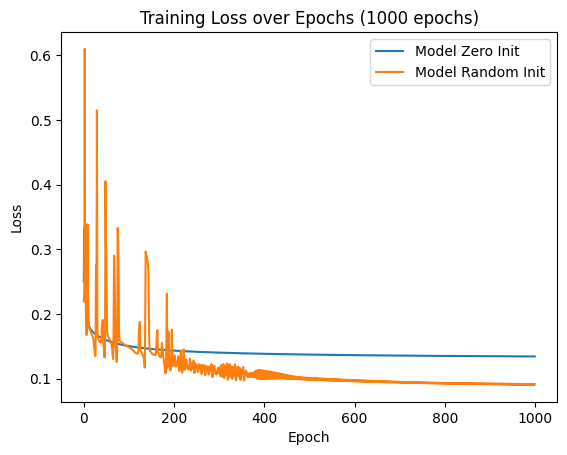

Model Zero Init Accuracy: 0.66339837238945
Model Random Init Accuracy: 0.8681243259143053


In [55]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def sigmoid_derivative(x):
    return x * (1 - x)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, weight_init='random'):
        if weight_init == 'random':
            self.weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2 / (input_size + hidden_size))
            self.weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))
        elif weight_init == 'zero':
            self.weights_input_hidden = np.zeros((input_size, hidden_size))
            self.weights_hidden_output = np.zeros((hidden_size, output_size))
        else:
            raise ValueError("Invalid weight initialization method")

    def forward(self, inputs):
        # Forward pass
        self.hidden_activations = sigmoid(np.dot(inputs, self.weights_input_hidden))
        self.output = sigmoid(np.dot(self.hidden_activations, self.weights_hidden_output))
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass
        output_error = targets - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_activations)

        self.weights_hidden_output += self.hidden_activations.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        losses = []

        for epoch in range(epochs):
            self.forward(inputs)
            self.backward(inputs, targets, learning_rate)

            # Calculate and store the mean squared error
            loss = np.mean(np.square(targets - self.output))
            losses.append(loss)

        return losses
    def train_early_stopping(self, inputs, targets, val_inputs, val_targets, epochs, learning_rate, patience=10):
        losses = []
        val_losses = []
        best_val_loss = float('inf')
        patience_counter = 0
    
        for epoch in range(epochs):
            self.forward(inputs)
            self.backward(inputs, targets, learning_rate)
    
            # Calculate and store the mean squared error on the training set
            loss = np.mean(np.square(targets - self.output))
            losses.append(loss)

            val_outputs = self.predict(val_inputs)
            val_loss = np.mean(np.square(val_targets - val_outputs))
            val_losses.append(val_loss)
    
            # Check for early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
    
            if patience_counter == patience:
                print(f"Early stopping at epoch {epoch}. Learning Rate: {learning_rate}, Best validation loss: {best_val_loss}")

                break
    
        return losses, val_losses

    def predict(self, inputs):
        # Make predictions using the trained model
        hidden_activations = sigmoid(np.dot(inputs, self.weights_input_hidden))
        predictions = sigmoid(np.dot(hidden_activations, self.weights_hidden_output))
        return predictions

def calculate_accuracy(predictions, targets):
    # Convert predictions to binary values (0 or 1)
    binary_predictions = np.round(predictions)
    accuracy = np.mean(binary_predictions == targets)
    return accuracy


input_size = X_train.shape[1]
output_size = y_train.shape[1]
sample_size = X_train.shape[0]

hidden_size = 5
learning_rate = 0.01
epochs=1000
# Model 1: Initialize weights with zero values
model_zero_init = SimpleNeuralNetwork(input_size, hidden_size, output_size, weight_init='zero')

# Train the model with zero weight initialization 
losses_zero_init = model_zero_init.train(X_train, y_train, epochs, learning_rate)

# Model 2: Initialize weights with small random values
model_random_init = SimpleNeuralNetwork(input_size, hidden_size, output_size, weight_init='random')

# Train the model with random weight initialization 
losses_random_init = model_random_init.train(X_train, y_train, epochs, learning_rate)

# Display losses for every 100 epochs for both models
for epoch in range(0, epochs, 100):
    print(f"Epoch {epoch}, Model Zero Init Loss: {losses_zero_init[epoch]}, Model Random Init Loss: {losses_random_init[epoch]}")

predictions_zero_init = model_zero_init.predict(X_train)
predictions_random_init = model_random_init.predict(X_train)

# Calculate accuracy for both models
accuracy_zero_init = calculate_accuracy(predictions_zero_init, y_train)
accuracy_random_init = calculate_accuracy(predictions_random_init, y_train)

plt.plot(losses_zero_init, label='Model Zero Init')
plt.plot(losses_random_init, label='Model Random Init')
plt.title('Training Loss over Epochs (1000 epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Model Zero Init Accuracy:", accuracy_zero_init)
print("Model Random Init Accuracy:", accuracy_random_init)

Model (Random Init, LR=0.1) Final Loss: 0.2500004797524279
Model (Random Init, LR=0.05) Final Loss: 0.33660161396202415
Model (Random Init, LR=0.01) Final Loss: 0.13041654286324697
Model (Random Init, LR=0.005) Final Loss: 0.0882528610466945
Model (Random Init, LR=0.001) Final Loss: 0.08924621867118872


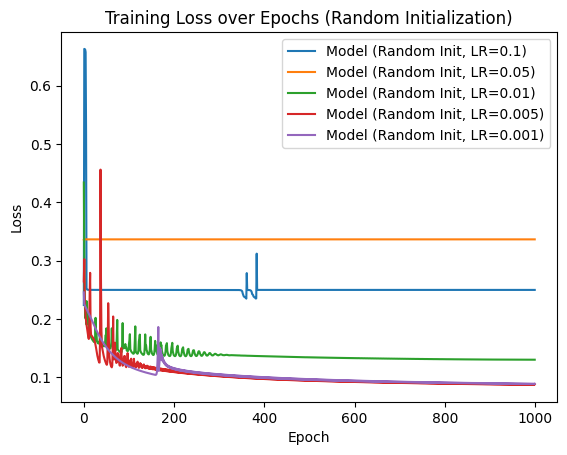

In [56]:
hidden_size = 5
epochs = 1000

learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]

# Train and plot only for 'random' weight initialization
weight_init = 'random'
for learning_rate in learning_rates:

    model = SimpleNeuralNetwork(input_size, hidden_size, output_size, weight_init=weight_init)
    losses = model.train(X_train, y_train, epochs, learning_rate)

    plt.plot(losses, label=f'Model ({weight_init.capitalize()} Init, LR={learning_rate})')

    # Display losses for each learning rate
    print(f'Model ({weight_init.capitalize()} Init, LR={learning_rate}) Final Loss: {losses[-1]}')

plt.title('Training Loss over Epochs (Random Initialization)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model (Zero Init, LR=0.1) Final Loss: 0.33660162761055007
Model (Zero Init, LR=0.05) Final Loss: 0.33660162760724205
Model (Zero Init, LR=0.01) Final Loss: 0.13416670264814107
Model (Zero Init, LR=0.005) Final Loss: 0.13706582986562546
Model (Zero Init, LR=0.001) Final Loss: 0.15053167271036388


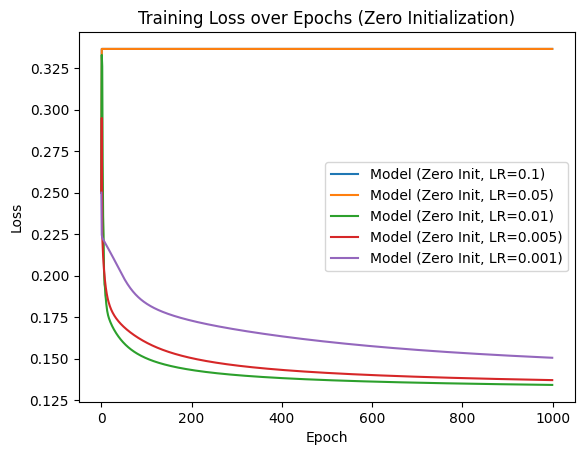

In [62]:
hidden_size = 5
epochs = 1000

learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]

# Train and plot only for 'zero' weight initialization
weight_init = 'zero'
for learning_rate in learning_rates:

    model = SimpleNeuralNetwork(input_size, hidden_size, output_size, weight_init=weight_init)

    losses = model.train(X_train, y_train, epochs, learning_rate)

    plt.plot(losses, label=f'Model ({weight_init.capitalize()} Init, LR={learning_rate})')

    # Display losses for each learning rate
    print(f'Model ({weight_init.capitalize()} Init, LR={learning_rate}) Final Loss: {losses[-1]}')

plt.title('Training Loss over Epochs (Zero Initialization)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
X_train

,Year,FuelConsump_per_100km,Kilometres,CylindersinEngine,Doors,Seats,Engine_size(L),UsedOrNew_DEMO,UsedOrNew_NEW,UsedOrNew_USED,...,DriveType_Front,DriveType_Other,DriveType_Rear,FuelType_Diesel,FuelType_Hybrid,FuelType_LPG,FuelType_Leaded,FuelType_Other,FuelType_Premium,FuelType_Unleaded
4462,0.911111,0.296296,0.035993,0.2,0.000000,0.05,0.222222,0,0,1,...,0,0,1,1,0,0,0,0,0,0
906,0.777778,0.296296,0.350858,0.2,0.666667,0.15,0.222222,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6741,0.800000,0.222222,0.244820,0.2,1.000000,0.15,0.111111,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3693,0.977778,0.148148,0.001756,0.2,1.000000,0.15,0.111111,0,0,1,...,1,0,0,0,1,0,0,0,0,0
13525,1.000000,0.000000,0.000000,0.2,0.000000,0.05,0.555556,0,1,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.844444,0.333333,0.347944,0.4,0.666667,0.25,0.333333,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13418,1.000000,0.000000,0.000000,0.2,0.333333,0.00,0.222222,0,1,0,...,0,0,1,1,0,0,0,0,0,0
5390,0.955556,0.296296,0.198051,0.2,0.666667,0.15,0.333333,0,0,1,...,0,0,0,1,0,0,0,0,0,0
860,0.733333,0.370370,0.273786,0.4,0.666667,0.15,0.333333,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [58]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Early stopping at epoch 10. Learning Rate: 0.1, Best validation loss: 0.3371454711802366
Early stopping at epoch 10. Learning Rate: 0.05, Best validation loss: 0.3371454711802202
Early stopping at epoch 35. Learning Rate: 0.01, Best validation loss: 0.13693321428639083
Early stopping at epoch 49. Learning Rate: 0.005, Best validation loss: 0.13110672660391826
Early stopping at epoch 162. Learning Rate: 0.001, Best validation loss: 0.10255839388304291


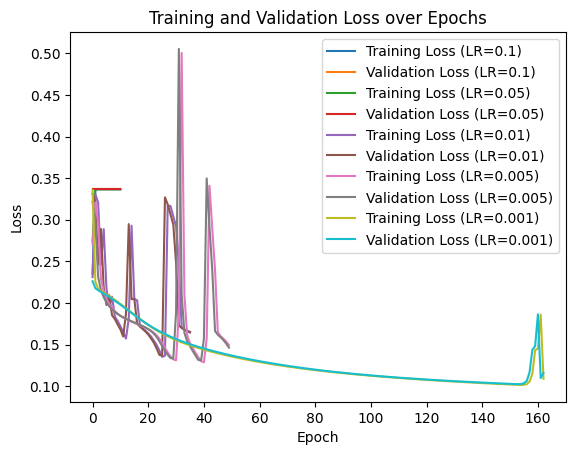

In [59]:
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
patience = 10
epochs = 1000

for lr in learning_rates:
    model = SimpleNeuralNetwork(input_size, hidden_size, output_size, weight_init='random')
    train_losses, val_losses = model.train_early_stopping(X_train, y_train, X_val, y_val, epochs, lr, patience)
    
    plt.plot(train_losses, label=f'Training Loss (LR={lr})')
    plt.plot(val_losses, label=f'Validation Loss (LR={lr})')

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [60]:
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
patience = 10
epochs = 1000

results = {}

for lr in learning_rates:
    model = SimpleNeuralNetwork(input_size, hidden_size, output_size, weight_init='random')
    train_losses, val_losses = model.train_early_stopping(X_train, y_train, X_val, y_val, epochs, lr, patience)
    
    # Validate on training set
    predictions_train = model.predict(X_train)
    train_accuracy = calculate_accuracy(predictions_train, y_train)

    # Validate on validation set
    predictions_val = model.predict(X_val)
    val_accuracy = calculate_accuracy(predictions_val, y_val)

    # Validate on test set
    predictions_test = model.predict(X_test)
    test_accuracy = calculate_accuracy(predictions_test, y_test)

    results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    }

    print(f"Final Training Accuracy: {train_accuracy}")
    print(f"Final Validation Accuracy: {val_accuracy}")
    print(f"Final Test Accuracy: {test_accuracy}")
    print("\n")

Early stopping at epoch 10. Learning Rate: 0.1, Best validation loss: 0.33714547118023785
Final Training Accuracy: 0.66339837238945
Final Validation Accuracy: 0.6628545288197621
Final Test Accuracy: 0.6770356816102471


Early stopping at epoch 42. Learning Rate: 0.05, Best validation loss: 0.23016258232648398
Final Training Accuracy: 0.33660162761055007
Final Validation Accuracy: 0.33714547118023785
Final Test Accuracy: 0.322964318389753


Early stopping at epoch 40. Learning Rate: 0.01, Best validation loss: 0.1336456336214476
Final Training Accuracy: 0.66339837238945
Final Validation Accuracy: 0.6628545288197621
Final Test Accuracy: 0.6770356816102471


Early stopping at epoch 55. Learning Rate: 0.005, Best validation loss: 0.12606618910706066
Final Training Accuracy: 0.8143935679968625
Final Validation Accuracy: 0.8147301006404392
Final Test Accuracy: 0.8229643183897529


Early stopping at epoch 198. Learning Rate: 0.001, Best validation loss: 0.1028729106954787
Final Training Accur